In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import csv

from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [2]:
#PCA function for DATA compression

#type of raw_data : numpy.ndarray
#type of comp_dim : integer(>0)

def PCA(raw_data, comp_dim):
    import numpy as np
    
    if comp_dim > 0:
        raw_dim = raw_data.shape[1]
        
        if comp_dim > raw_dim:
            comp_dim = raw_dim
            
        eigs = np.linalg.eig

        #the covariance matrix of raw_data
        covariance = np.dot(raw_data.T, raw_data)
        
        #the first comp_dim weight vectors(eigenvalues of the covariance matrix)
        eigenvectors = eigs(covariance)[1][:, :comp_dim]
        
        #components matrix
        scores = np.dot(raw_data, eigenvectors)
        
        return scores
    
    else:
        print("comp_dim should be a positive integer")
        return raw_data    

In [3]:
#Example

with open('../data/credit_card_dataset.csv', 'r') as f:
    reader = csv.reader(f)
    credit_card_dataset = list(reader)

del credit_card_dataset[0]

credit_card_dataset = [[float(numStr) if numStr else 0 for numStr in sublist[1:]] for sublist in credit_card_dataset]
credit_card_dataset = np.array(credit_card_dataset)
print(type(credit_card_dataset))
print(credit_card_dataset.shape)

<class 'numpy.ndarray'>
(8950, 17)


(8950, 3)


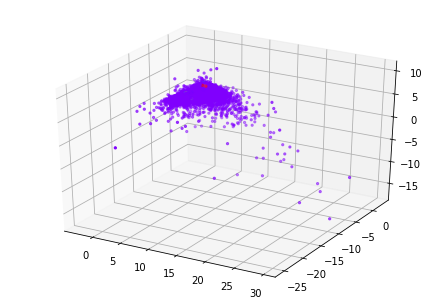

In [4]:
X = StandardScaler().fit_transform(credit_card_dataset)
algorithm = cluster.DBSCAN(eps=0.2)
algorithm.fit(X)

if hasattr(algorithm, 'labels_'):
    y_pred = algorithm.labels_.astype(np.int)
else:
    y_pred = algorithm.predict(X)
    
fig = plt.figure()
ax = Axes3D(fig)

#Compress the dataset into 3-dim
dataset_in_3_dim = PCA(X, 3)
print(dataset_in_3_dim.shape)

color_num = int(max(y_pred) + 1)

ax.scatter(dataset_in_3_dim[:, 0], dataset_in_3_dim[:, 1], dataset_in_3_dim[:, 2],\
           c=y_pred, s=5, cmap=plt.cm.get_cmap('rainbow', color_num))
plt.show()

(8950, 2)


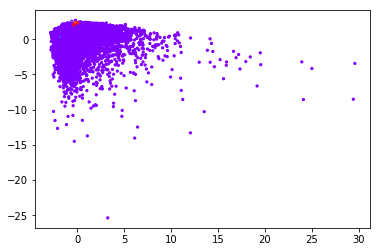

In [5]:
#Compress the dataset into 3-dim
dataset_in_2_dim = PCA(X, 2)
print(dataset_in_2_dim.shape)

plt.scatter(dataset_in_2_dim[:, 0], dataset_in_2_dim[:, 1], c=y_pred, s=5, cmap=plt.cm.get_cmap('rainbow', color_num))
plt.show()